# Classification en *k-means*

Ce type de classification non supervisée est un algorithme de machine learning très utile pour classifier rapidement des bases de données volumineuses. En effet, plutôt que de calculer les distances de l'ensemble des points entre eux, il va procéder ainsi :  
- Il initialise un nombre de centroïdes (de classes) qu'il va placer dans l'espace des points de manière aléatoire.   
- Il associe ensuite à chaque centroïde les points qui lui sont les plus proches, créant ainsi autant de classes que de centroïdes.  
- Il déplace ensuite les centroïdes au centre de gravité de leur classe.  
- Il répète les étapes précédentes jusqu'à la convergence du modèle.  

Comme une illustration vaut mieux que trop d'explications, on peut regarder sur cette vidéo comment fonctionne l'algorithme : 


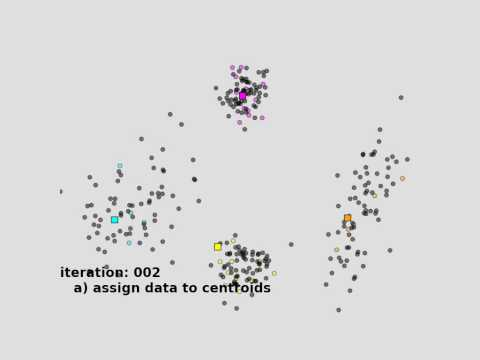

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('5I3Ei69I40s', width=800, height=300)

Pour un nombre de classes donné, cet algorithme cherche à __minimiser la variance intra-classe__ et à __maximiser la variance inter-classes__. 

## *k-means* avec Python  

Sur Python, on va utiliser la fonction `Kmeans` de `scikit-learn`. Elle propose de nombreux paramètres mais le seul qui nous intéresse pour l'instant c'est `n_clusters`, le nombre de classes voulu. On ajuste notre modèle sur nos données avec `.fit` et on obtient nos classes avec `. predict`. 

__Exercice__  
- Faites tourner un modèle k-means sur les données `wine` disponibles dans scikit learn pour essayer de retrouver les 3 classes de vin.   
- Comparez vos résultats avec la vraie classification. L'algorithme a-t-il su partitionner correctement les données?  


## Choix du nombre de classes

On voit bien que la convergence ou non de l'algorithme tient aussi bien aux données qu'au nombre de classes que l'on choisit. De plus, même si l'algorithme converge il n'est pas dit que le nombre de classes choisi soit pertinent. Que se passerait-il par exemple si nous avions choisi 2 classes pour l'exemple ci-dessus?

Un outil indispensable pour mener une analyse en k-means est l'évolution de la distance de chaque point à son centroïde en fonction du nombre de classes choisi. Cette distance décroît avec le nombre de classes jusqu'à atteindre 0 lorsque le nombre de classes est égal au nombre d'observations. Sur Python, on obtient cette valeur en appelant `.inertia_` depuis un objet KMeans.    

__Exercice__  
Représenter l'évolution de l'inertie en fonction du nombre de classes (testez de 1 classe à 25 classes) pour le problème précédent. La classification en 3 catégories est-elle justifiée?

## Limites des *k-means*

La grande limite des *k-means* est sans doute que cet algorithme nécessite un choix a priori du nombre de classes. Il existe certes des outils comme le graphique que l'on vient de faire pour orienter notre décision mais il ne reflètera pas forcément la qualité de notre clustering.  

Un bon exemple de cette limite peut s'illustrer avec les données suivantes : 

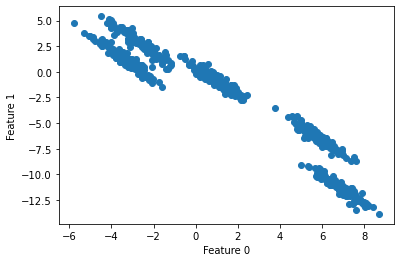

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

__Exercice__ :  
Choisissez le nombre de classes visuellement et avec le graphique de l'évolution des distance aux centroïdes. Les deux manières correspondent-elles?  
Représentez graphiquement la classification obtenue avec l'algorithme des k-means.

# DBSCAN 

Le clustering avec DBSCAN suit une logique différente de celles des k-means. Cette fois, l'algorithme va parcourir les points un par un et compter le nombre de points voisins en fonction d'une distance epsilon que l'on aura paramétrée. Le point sera alors considéré comme :  
- un **core point** si son voisinage proche (< epsilon) contient au moins k points (k est à paramétrer)  
- un **border point** si son voisinage proche contient moins de k points mais qu'il se trouve dans le voisinage proche d'un point (k différent de 0).  
- un **bruit (noise)** s'il n'est ni un core point ni un border point.  

Les points d'une même classe sont donc tous ceux pouvant être reliés par des core points communs. L'algorithme fonctionne donc de la manière suivante :  
- Il s'initialise sur un point, s'il détermine que c'est un core point il continue à déterminer l'ensemble des points de son voisinage jusqu'à ce qu'il tombe sur un point qui n'a pas le minimum requis de voisins (border point ou noise).  
- Il passe à un autre point qui n'a pas été visité et continue.  

__À noter :__ Un point peut être considéré comme un bruit dans un premier temps puis redéfini comme un border point si un point visité à son voisingae s'avère être un core point.

## Différences avec k-means

Ici l'algorithme ne cherche pas à catégoriser les données en un nombre de classes défini mais à mettre en évidence des zones de densité de points. C'est l'algorithme lui-même qui va définir un nombre de classes en fonction du nombre de zones denses qu'il aura parcourues. De plus, certains points peuvent ne pas être classés (les bruits).   
Le gros avantage de cet algorithme est donc qu'il ne présuppose pas *a priori* la forme de la relation entre les points d'une classe mais met en évidence un certain nombre de zones denses.

Là encore une vidéo peut rendre tout ça  plus clair : 

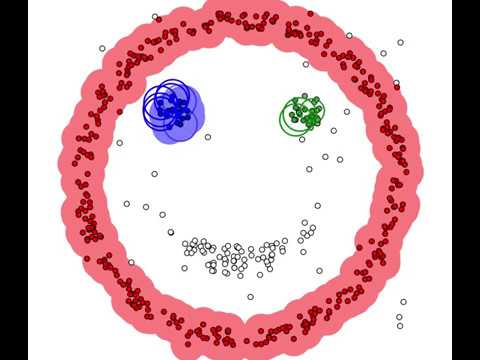

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('h53WMIImUuc', width=800, height=300)

## Implémentation sous python

La fonction `DBSCAN` est disponible dans scikit learn : 


In [4]:
from sklearn.cluster import DBSCAN

Les deux paramètres à déterminer sont `min_sample`, le nombre de points minimum à trouver au voisinage d'un point pour qu'il soit considéré comme un core-point, et `eps` la distance en dessous de laquel on considère qu'un point est au voisinage d'un autre.

__Exercice__  
- Faites un DBSCAN sur les données précédentes sur lesquelles le k-means ne fonctionnait pas correctement.  
- Représentez graphiquement les résultats en faisant à chaque fois varier `min_sample` et `eps`. Arrivez-vous à trouver un paramétrage qui permette de retrouver les 5 classes que l'on voit visuellement? 

## Exercice : classification des fromages

Petit cas pratique dans lequel on cherche à voir si certains fromages sont plus proches que d'autres en fonction de leurs caractéristiques :
1. Importez la base `carac_fromages.txt` disponible dans le dossier `data` et affichez quelques stats descriptives sur ses variables   
2. Transformez les variables numériques de manière à pouvoir mener une analyse en *k-means*  
3. Justifiez un choix de nombre de classes avec cette méthode et opérez le clustering de ces données  
4. Observez les noms des fromages d'une même classe. Trouvez-vous logique qu'ils soient associés?  
5. Faites une classification avec DBSCAN et comparez les résultats

## Sources
Un article très intéressant sur DBSCAN et k-means dont certains exemples sont extraits : https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea